In [1]:
# import libraries needed by this notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display

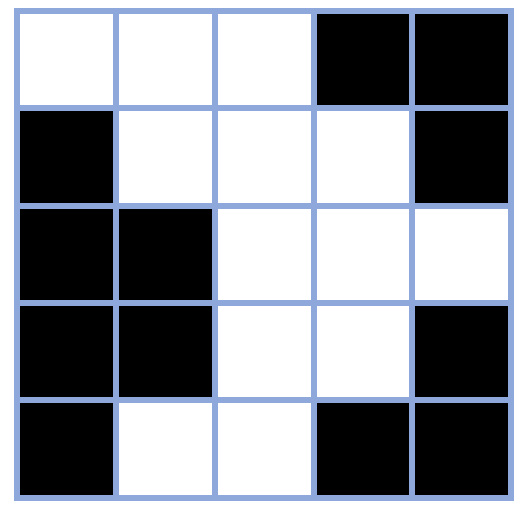

In [2]:
# We want to represent the following image as a numpy array
display(Image(filename='img.png'))

In [3]:
input_image = np.array([
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 0, 1, 1],
])

In [4]:
# create a function that can display numpy array as a grayscale image
def show(n):
    plt.imshow(n, cmap='Greys', interpolation='nearest')

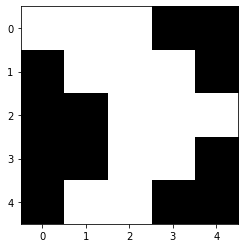

In [5]:
# our numpy array looks very much like the original image (possibly inverted)
show(input_image)

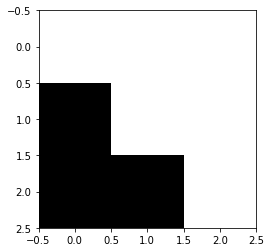

In [6]:
def get_window(array, y, x, h, w):
    """This function returns a new 2d array, w*h elements in size
    centered around position x,y. We need this for our convolution
    algorithm"""
    window_start_y = y - h // 2
    window_start_x = x - w // 2

    window_end_y = y + h // 2 + 1
    window_end_x = x + w // 2 + 1

    return array[window_start_y:window_end_y, window_start_x:window_end_x]

# show a 3x3 window centered around pixel 1,1
show(get_window(input_image, 1, 1, 3, 3))

In [7]:
# Kernel is a 2D array, in which all the values SUM to 1
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
])

In [8]:
# arrays can be multiplied by a constant
np.array([1, 1, 2]) * 2

array([2, 2, 4])

In [9]:
# and 2 arrays with the same dimensions can be multiplied
np.array([
    [0, 1, 1],
    [2, 0, 2],
    [3, 3, 0],
]) * np.array([
    [2, 2, 2],
    [2, 2, 2],
    [2, 2, 2],
])

array([[0, 2, 2],
       [4, 0, 4],
       [6, 6, 0]])

In [10]:
# we multiply a 2x2 window of an array with a 2x2 array
np.ones((10, 10))[0:2, 0:2] * np.array([
    [2, 0],
    [0, 2],
])

array([[2., 0.],
       [0., 2.]])

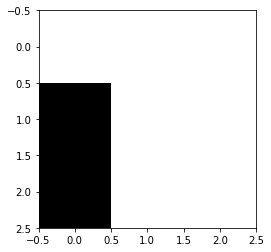

In [11]:
def filter(source, kern):
    """1. visits all available pixels in our source array
    2. takes an n*n window of surrounding pixels at each location
    3. find the dot product of this window and our kernel
    4. save the resulting value to the output array"""
    h, w = source.shape
    kern_h, kern_w = kern.shape

    padding_y = kern_h // 2
    padding_x = kern_w // 2

    new_h = h - (2 * padding_y)
    new_w = w - (2 * padding_x)

    output_image = np.zeros((new_h, new_w), dtype='float64')

    # visit all pixels in image, at least padding_x/y away from the edge
    for y in range(padding_y, h - padding_y):
        for x in range(padding_x, w - padding_x):
            dest_y = y - padding_y
            dest_x = x - padding_x
            result = ((get_window(source, y, x, kern_h, kern_w)) * kern).sum()
            output_image[dest_y, dest_x] = result
    return output_image

# using the "identity" kernel the output is the original image
# (without the first and last row and column)
show(filter(input_image, kernel))

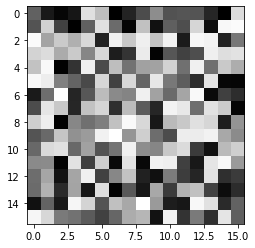

In [12]:
# generate some larger input data
new_input = np.random.random((16, 16))
show(new_input)

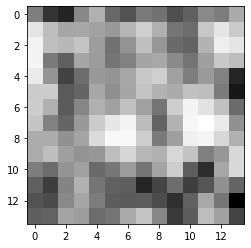

In [13]:
# a gaussian distribution produces a pleasing blur effect
gaus = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
show(filter(new_input, gaus))

In [14]:
def process_image(filename):
    """take a full color image, and return a grayscale version at 0.25 size"""
    image = cv2.imread(filename)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    (w, h) = image.shape
    new_dimensions = (h // 4, w // 4)
    image = cv2.resize(image, new_dimensions)
    return image

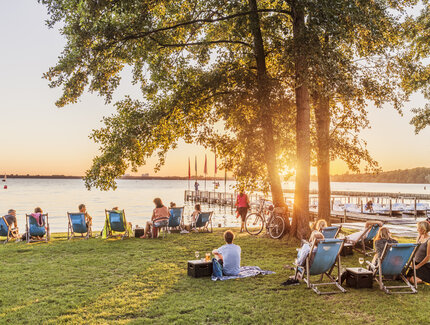

In [15]:
# we will use this image for processing
lake_orig = display(Image(filename='lake.jpg'))

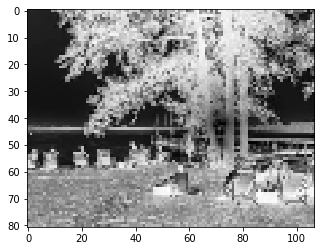

In [16]:
lake = process_image('lake.jpg')
# show the smaller, grayscale image we will work with
show(lake)

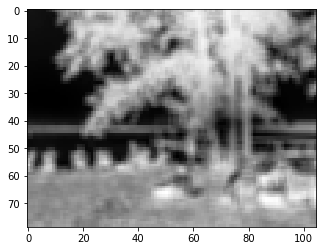

In [17]:
# applying our convolution to the image with a kernel filled with a constant
# blurs the image (finds the mean value of each pixel and its neighbors)
show(filter(lake, np.ones((3,3))))

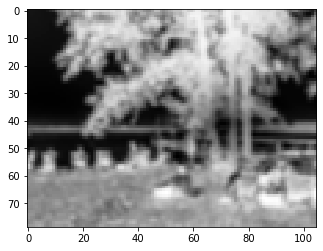

In [18]:
# the gaussian kernel blurs the image but preserves some details better
show(filter(lake, gaus))

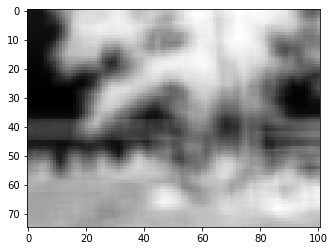

In [19]:
# a larger kernel increased the blur effect
show(filter(lake, np.ones((7,7))))

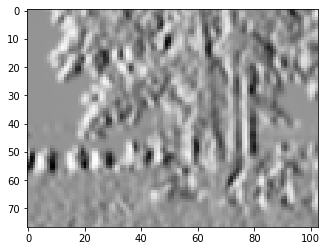

In [20]:
# this kernel emphasises vertical edges in the source
v_edges = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])
show(filter(filter(lake, gaus), v_edges))

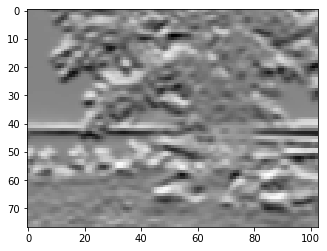

In [21]:
# this kernel emphasises horizontal edges in the source
h_edges = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])
show(filter(filter(lake, gaus), h_edges))